## 手法1
- 画像のクラスタリング　ディレクトリに分ける

In [39]:
from glob import glob
import shutil
import cv2
import os
from sklearn.cluster import KMeans
import numpy as np

In [40]:
path = "/Users/kunia/Desktop/学習画像/*.jp*"
impathlist = glob(path)

features = np.array([cv2.resize(cv2.imread(p), (64, 64), cv2.INTER_CUBIC) for p in impathlist])
print(f"features.shape:{features.shape}, {features.shape[0]}")
features = features.reshape(features.shape[0], -1)

model1 = KMeans(n_clusters=10).fit(features)

features.shape:(68, 64, 64, 3), 68


/Users/kunia/opt/anaconda3/envs/detection/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
OUTPUT_DIR = "/Users/kunia/Desktop/学習画像/clustering"
for i in range(model1.n_clusters):
    cluster_dir = OUTPUT_DIR + f"/cluster{i}"
    if os.path.exists(cluster_dir):
        shutil.rmtree(cluster_dir)
    os.makedirs(cluster_dir)

for label, p in zip(model1.labels_, impathlist):
    shutil.copyfile(p, OUTPUT_DIR + f"/cluster{label}/{p.split('/')[-1]}")

## 手法2
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

In [42]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [43]:
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


(1797, 8, 8)


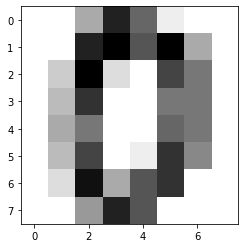

In [44]:
images = np.array([np.reshape(data[i], (8,8)) for i in range(n_samples)])
print(f"{images.shape}")
plt.imshow(images[0], cmap=plt.cm.gray_r, interpolation='nearest')

x_min,x_max, y_min, y_max) -32.169916535033614 32.70012482181798 -28.494444884392475 31.092197812965626


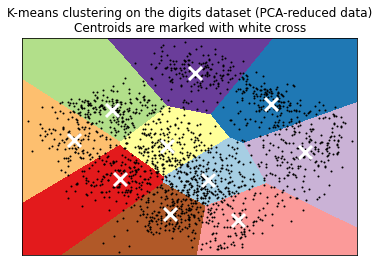

In [45]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# step size 0.02
h = 0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
print("x_min,x_max, y_min, y_max)", x_min,x_max, y_min, y_max)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## 手法2をローカルデータに適用する

In [46]:
import glob
path = "/Users/kunia/Desktop/学習画像/*.jp*"
impathlist = glob.glob(path)

features = np.array([cv2.resize(cv2.imread(p), (8, 8), cv2.INTER_CUBIC) for p in impathlist])
features = features/255
features.shape

(68, 8, 8, 3)

In [47]:
features = features.reshape(features.shape[0], -1)
reduced_data = PCA(n_components=2).fit_transform(features)

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

KMeans(n_clusters=10, n_init=4)

In [48]:
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

print(x_min,x_max, y_min, y_max)

-5.892567228961679 8.633125057790107 -4.1076366588325275 4.856205343986376


In [49]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

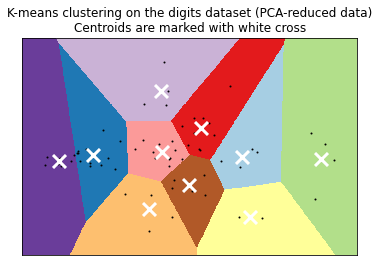

In [50]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()